Main base_case DC plot coords: [40.31331 40.31321 40.31322 40.31322] [79.78669    79.78661333 79.7867     79.786702  ]


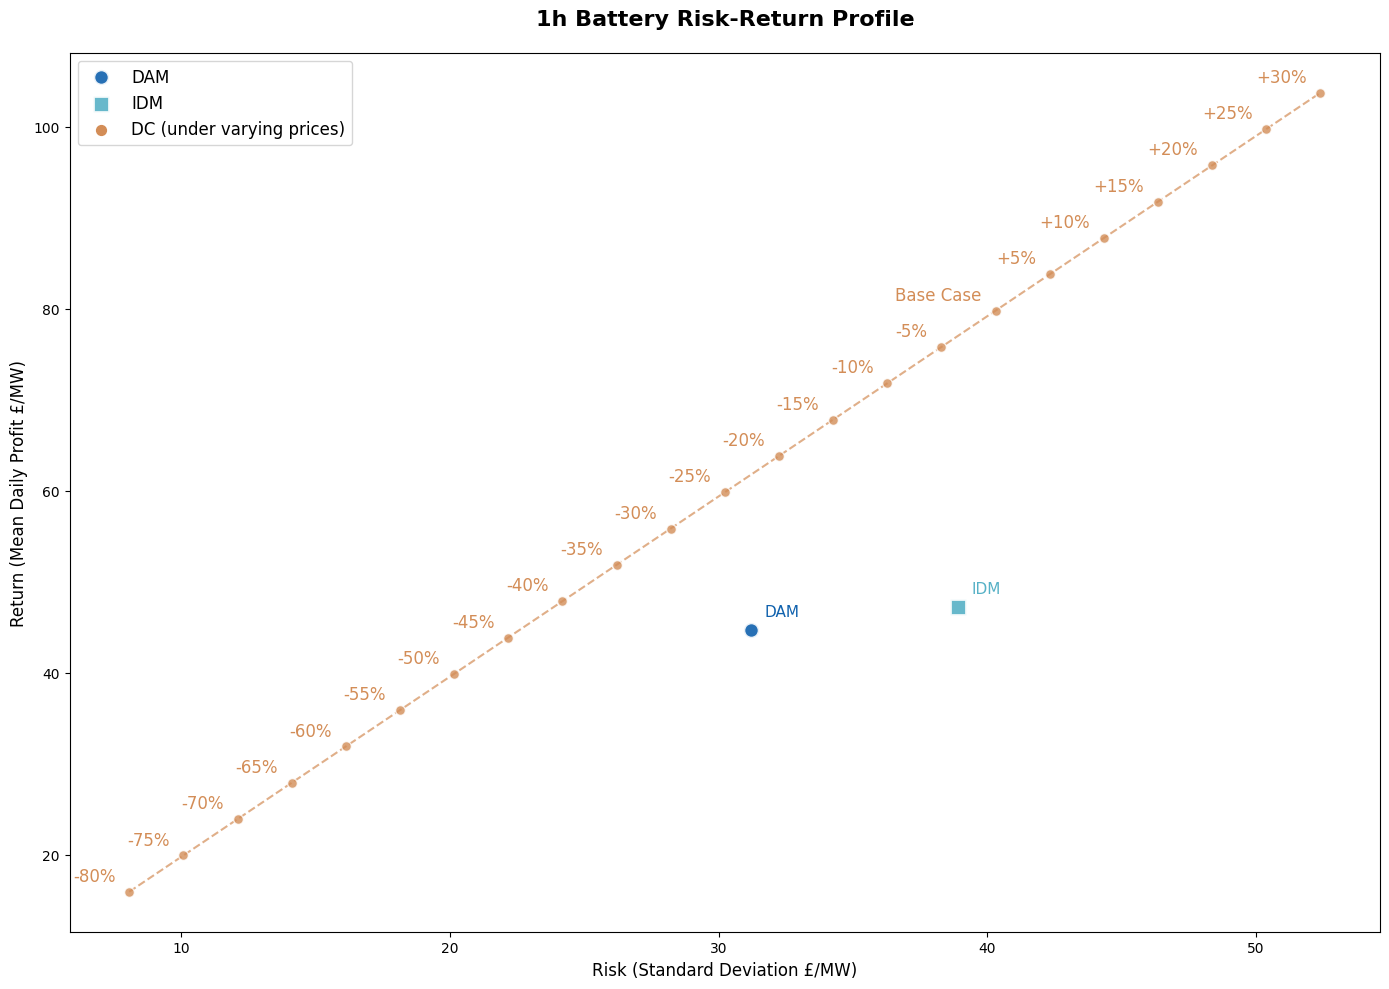

In [14]:
'''1h Risk-Return Profile - All DC Price Scenarios Combined (Overlay with Profit Stats CSV, minimal legend, lines, dots)'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load main stats
main_stats = pd.read_csv('//Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Fig_14_Appendix_9_Model_Outputs/Fig_14_Appendix_9_Data.csv')
main_stats['duration'] = main_stats['energy_mwh'] / main_stats['power_mw']
main_1h = main_stats[(main_stats['duration'] == 1.0)].copy()

# Load overlay stats
overlay_stats = pd.read_csv('/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Fig_14_Appendix_9_Model_Outputs/Fig_14_Appendix_9_Data.csv')
overlay_stats['duration'] = overlay_stats['energy_mwh'] / overlay_stats['power_mw']
overlay_1h = overlay_stats[(overlay_stats['duration'] == 1.0)].copy()

# Normalized values (per MW)
for df in [main_1h, overlay_1h]:
    df['dam_mean_norm'] = df['dam_mean'] / df['power_mw']
    df['idm_mean_norm'] = df['idm_mean'] / df['power_mw']
    df['dc_mean_norm'] = df['dc_mean'] / df['power_mw']
    df['dam_std_norm'] = df['dam_std'] / df['power_mw']
    df['idm_std_norm'] = df['idm_std'] / df['power_mw']
    df['dc_std_norm'] = df['dc_std'] / df['power_mw']

# Sort scenarios by scale factor (dc_price_scale_factor already in CSV)
main_scenarios = main_1h[['scenario', 'dc_price_scale_factor']].drop_duplicates().sort_values('dc_price_scale_factor')['scenario'].tolist()
overlay_scenarios = overlay_1h[['scenario', 'dc_price_scale_factor']].drop_duplicates().sort_values('dc_price_scale_factor')['scenario'].tolist()

# Colors and markers
main_colors = {'DAM': '#0f61ad', 'IDM': '#56b1c6', 'DC': '#d38d57'}
overlay_colors = {'DAM': '#ff9800', 'IDM': '#8bc34a', 'DC': '#e91e63'}
markers = {'DAM': 'o', 'IDM': 's', 'DC': 'o'}  # use small dots for DC

fig, ax = plt.subplots(1, 1, figsize=(14, 10))
legend_elements = []

# Plot DAM/IDM (identical for both datasets)
dam_mean = main_1h['dam_mean_norm'].mean()
dam_std = main_1h['dam_std_norm'].mean()
dam_scatter = ax.scatter(dam_std, dam_mean, c=main_colors['DAM'], marker=markers['DAM'],
                         s=120, alpha=0.9, linewidth=2, edgecolor='white', zorder=5)
ax.annotate('DAM', (dam_std, dam_mean), xytext=(10, 10), textcoords='offset points',
            fontsize=11, fontweight='normal', color=main_colors['DAM'])
legend_elements.append((dam_scatter, 'DAM'))

idm_mean = main_1h['idm_mean_norm'].mean()
idm_std = main_1h['idm_std_norm'].mean()
idm_scatter = ax.scatter(idm_std, idm_mean, c=main_colors['IDM'], marker=markers['IDM'],
                         s=120, alpha=0.9, linewidth=2, edgecolor='white', zorder=5)
ax.annotate('IDM', (idm_std, idm_mean), xytext=(10, 10), textcoords='offset points',
            fontsize=11, fontweight='normal', color=main_colors['IDM'])
legend_elements.append((idm_scatter, 'IDM'))

# Plot DC scenarios from main as small dots, connect with thin line
main_dc_x = []
main_dc_y = []
for scenario in main_scenarios:
    scenario_data = main_1h[main_1h['scenario'] == scenario]
    dc_mean_norm = scenario_data['dc_mean_norm'].mean()
    dc_std_norm = scenario_data['dc_std_norm'].mean()
    main_dc_x.append(dc_std_norm)
    main_dc_y.append(dc_mean_norm)
    # Format label: "base_case" -> "Base Case", "down_xx%" -> "-xx%", else keep as is
    if scenario == 'base_case':
        label = 'Base Case'
    elif scenario.startswith('down_'):
        percent = scenario.replace('down_', '').replace('%', '')
        label = f'-{percent}%'
    elif scenario.startswith('up_'):
        percent = scenario.replace('up_', '').replace('%', '')
        label = f'+{percent}%'
    else:
        label = scenario
    ax.scatter(dc_std_norm, dc_mean_norm, c=main_colors['DC'], marker='o',
               s=50, alpha=0.8, linewidth=1, edgecolor='white', zorder=3)
    # Shift labels slightly to the left with larger font size
    ax.annotate(label, (dc_std_norm, dc_mean_norm),
                xytext=(-10, 5), textcoords='offset points', fontsize=12, fontweight='normal',
                color=main_colors['DC'], ha='right', va='bottom')
# Connect main DC points
ax.plot(main_dc_x, main_dc_y, color=main_colors['DC'], linewidth=1.5, alpha=0.7, label='_nolegend_', linestyle="--")
legend_elements.append((ax.scatter([], [], c=main_colors['DC'], marker='o', s=50), 'DC (under varying prices)'))

# Customize plot
ax.set_xlabel('Risk (Standard Deviation £/MW)', fontsize=12)
ax.set_ylabel('Return (Mean Daily Profit £/MW)', fontsize=12)
ax.set_title('1h Battery Risk-Return Profile', fontsize=16, fontweight='bold', pad=20)

# Add legend
ax.legend([element[0] for element in legend_elements],
          [element[1] for element in legend_elements],
          loc='best', fontsize=12, frameon=True)

plt.tight_layout()

# Print coordinates for base_case before plotting
main_base = main_1h[main_1h['scenario'] == 'base_case']

print("Main base_case DC plot coords:", 
      main_base['dc_std_norm'].values, main_base['dc_mean_norm'].values)

Main base_case DC plot coords: [40.31331 40.31322 40.31322] [79.78669  79.7867   79.786702]


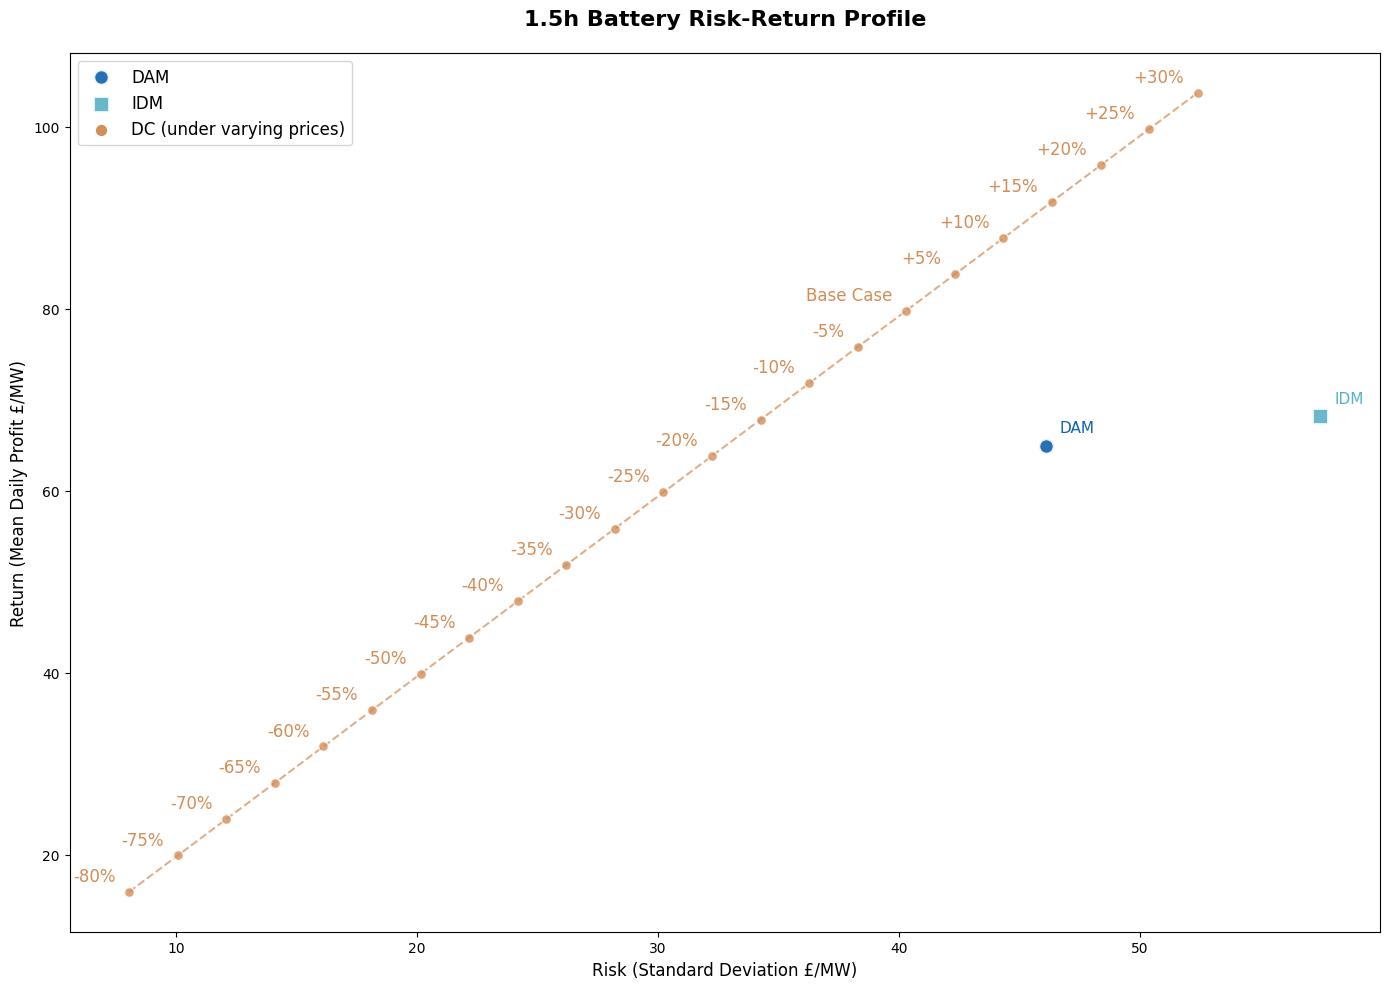

In [15]:
'''1.5h Risk-Return Profile - All DC Price Scenarios Combined (Overlay with Profit Stats CSV, minimal legend, lines, dots)'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load main stats
main_stats = pd.read_csv('//Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Fig_14_Appendix_9_Model_Outputs/Fig_14_Appendix_9_Data.csv')
main_stats['duration'] = main_stats['energy_mwh'] / main_stats['power_mw']
main_1_5h = main_stats[(main_stats['duration'] == 1.5)].copy()

# Load overlay stats
overlay_stats = pd.read_csv('/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Fig_14_Appendix_9_Model_Outputs/Fig_14_Appendix_9_Data.csv')
overlay_stats['duration'] = overlay_stats['energy_mwh'] / overlay_stats['power_mw']
overlay_1_5h = overlay_stats[(overlay_stats['duration'] == 1.5)].copy()

# Normalized values (per MW)
for df in [main_1_5h, overlay_1_5h]:
    df['dam_mean_norm'] = df['dam_mean'] / df['power_mw']
    df['idm_mean_norm'] = df['idm_mean'] / df['power_mw']
    df['dc_mean_norm'] = df['dc_mean'] / df['power_mw']
    df['dam_std_norm'] = df['dam_std'] / df['power_mw']
    df['idm_std_norm'] = df['idm_std'] / df['power_mw']
    df['dc_std_norm'] = df['dc_std'] / df['power_mw']

# Sort scenarios by scale factor (dc_price_scale_factor already in CSV)
main_scenarios = main_1_5h[['scenario', 'dc_price_scale_factor']].drop_duplicates().sort_values('dc_price_scale_factor')['scenario'].tolist()
overlay_scenarios = overlay_1_5h[['scenario', 'dc_price_scale_factor']].drop_duplicates().sort_values('dc_price_scale_factor')['scenario'].tolist()

# Colors and markers
main_colors = {'DAM': '#0f61ad', 'IDM': '#56b1c6', 'DC': '#d38d57'}
overlay_colors = {'DAM': '#ff9800', 'IDM': '#8bc34a', 'DC': '#e91e63'}
markers = {'DAM': 'o', 'IDM': 's', 'DC': 'o'}  # use small dots for DC

fig, ax = plt.subplots(1, 1, figsize=(14, 10))
legend_elements = []

# Plot DAM/IDM (identical for both datasets)
dam_mean = main_1_5h['dam_mean_norm'].mean()
dam_std = main_1_5h['dam_std_norm'].mean()
dam_scatter = ax.scatter(dam_std, dam_mean, c=main_colors['DAM'], marker=markers['DAM'],
                         s=120, alpha=0.9, linewidth=2, edgecolor='white', zorder=5)
ax.annotate('DAM', (dam_std, dam_mean), xytext=(10, 10), textcoords='offset points',
            fontsize=11, fontweight='normal', color=main_colors['DAM'])
legend_elements.append((dam_scatter, 'DAM'))

idm_mean = main_1_5h['idm_mean_norm'].mean()
idm_std = main_1_5h['idm_std_norm'].mean()
idm_scatter = ax.scatter(idm_std, idm_mean, c=main_colors['IDM'], marker=markers['IDM'],
                         s=120, alpha=0.9, linewidth=2, edgecolor='white', zorder=5)
ax.annotate('IDM', (idm_std, idm_mean), xytext=(10, 10), textcoords='offset points',
            fontsize=11, fontweight='normal', color=main_colors['IDM'])
legend_elements.append((idm_scatter, 'IDM'))

# Plot DC scenarios from main as small dots, connect with thin line
main_dc_x = []
main_dc_y = []
for scenario in main_scenarios:
    scenario_data = main_1_5h[main_1_5h['scenario'] == scenario]
    dc_mean_norm = scenario_data['dc_mean_norm'].mean()
    dc_std_norm = scenario_data['dc_std_norm'].mean()
    main_dc_x.append(dc_std_norm)
    main_dc_y.append(dc_mean_norm)
    # Format label: "base_case" -> "Base Case", "down_xx%" -> "-xx%", else keep as is
    if scenario == 'base_case':
        label = 'Base Case'
    elif scenario.startswith('down_'):
        percent = scenario.replace('down_', '').replace('%', '')
        label = f'-{percent}%'
    elif scenario.startswith('up_'):
        percent = scenario.replace('up_', '').replace('%', '')
        label = f'+{percent}%'
    else:
        label = scenario
    ax.scatter(dc_std_norm, dc_mean_norm, c=main_colors['DC'], marker='o',
               s=50, alpha=0.8, linewidth=1, edgecolor='white', zorder=3)
    # Shift labels slightly to the left with larger font size
    ax.annotate(label, (dc_std_norm, dc_mean_norm),
                xytext=(-10, 5), textcoords='offset points', fontsize=12, fontweight='normal',
                color=main_colors['DC'], ha='right', va='bottom')
# Connect main DC points
ax.plot(main_dc_x, main_dc_y, color=main_colors['DC'], linewidth=1.5, alpha=0.7, label='_nolegend_', linestyle="--")
legend_elements.append((ax.scatter([], [], c=main_colors['DC'], marker='o', s=50), 'DC (under varying prices)'))

# Customize plot
ax.set_xlabel('Risk (Standard Deviation £/MW)', fontsize=12)
ax.set_ylabel('Return (Mean Daily Profit £/MW)', fontsize=12)
ax.set_title('1.5h Battery Risk-Return Profile', fontsize=16, fontweight='bold', pad=20)

# Add legend
ax.legend([element[0] for element in legend_elements],
          [element[1] for element in legend_elements],
          loc='best', fontsize=12, frameon=True)

plt.tight_layout()

# Print coordinates for base_case before plotting
main_base = main_1_5h[main_1_5h['scenario'] == 'base_case']

print("Main base_case DC plot coords:", 
      main_base['dc_std_norm'].values, main_base['dc_mean_norm'].values)

Main base_case DC plot coords: [40.31331 40.31321 40.31322 40.31322 40.31322 40.31322 40.31322] [79.78669    79.78661333 79.7867     79.786702   79.786701   79.78670033
 79.78670075]


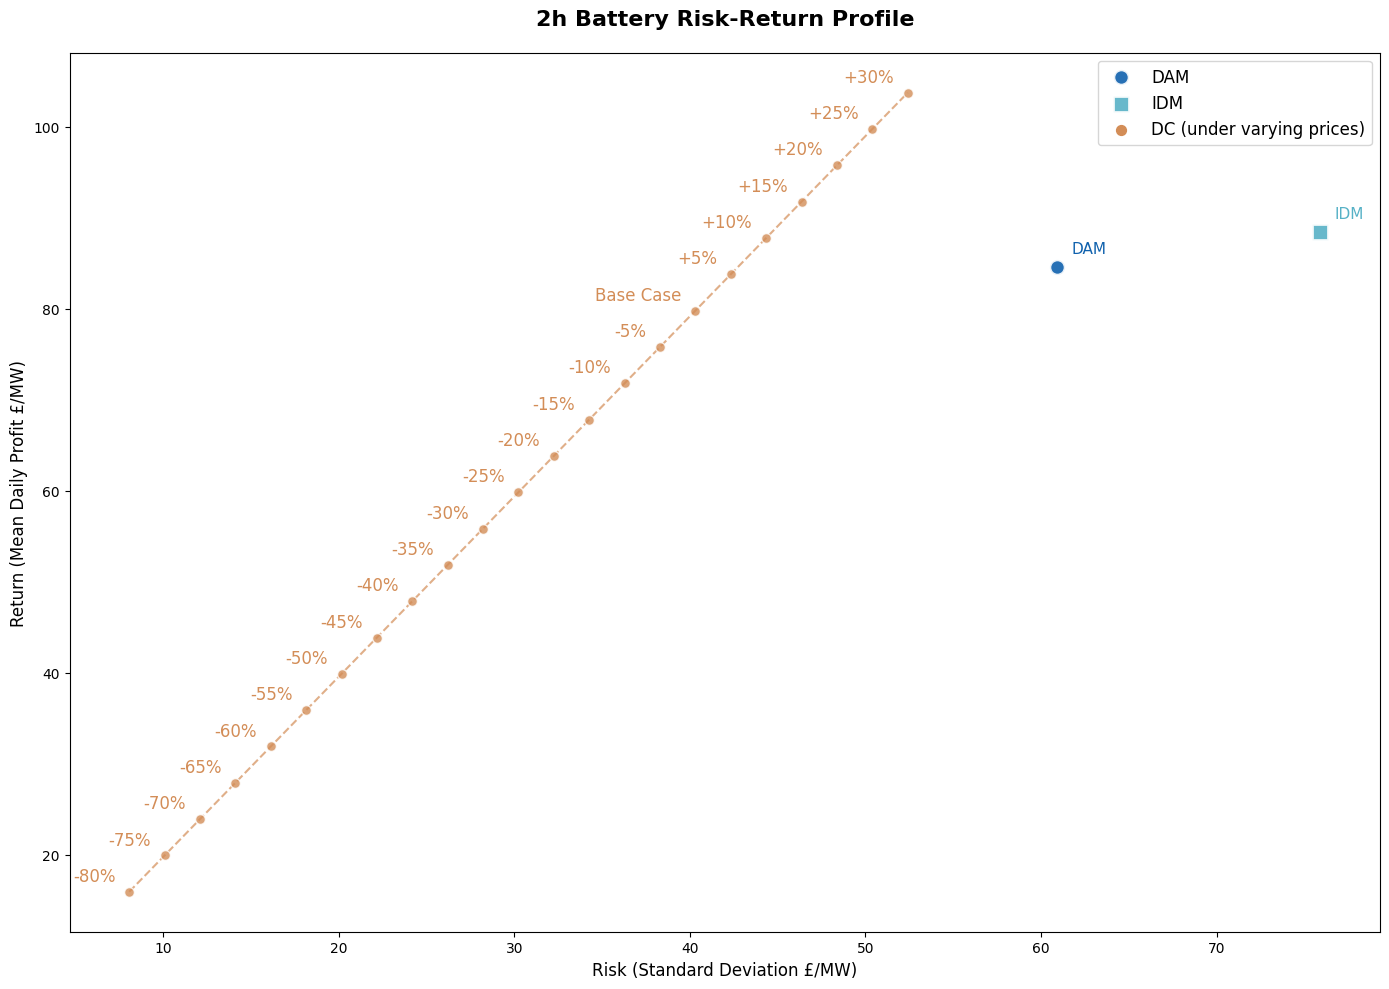

In [16]:
'''2h Risk-Return Profile - All DC Price Scenarios Combined (Overlay with Profit Stats CSV, minimal legend, lines, dots)'''
import pandas as pd
import matplotlib.pyplot as plt

# Load main stats
main_stats = pd.read_csv('/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Fig_14_Appendix_9_Model_Outputs/Fig_14_Appendix_9_Data.csv')
main_stats['duration'] = main_stats['energy_mwh'] / main_stats['power_mw']
main_2h = main_stats[(main_stats['duration'] == 2.0)].copy()

# Load overlay stats
overlay_stats = pd.read_csv('/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Fig_14_Appendix_9_Model_Outputs/Fig_14_Appendix_9_Data.csv')
overlay_stats['duration'] = overlay_stats['energy_mwh'] / overlay_stats['power_mw']
overlay_2h = overlay_stats[(overlay_stats['duration'] == 2.0)].copy()

# Normalized values (per MW)
for df in [main_2h, overlay_2h]:
    df['dam_mean_norm'] = df['dam_mean'] / df['power_mw']
    df['idm_mean_norm'] = df['idm_mean'] / df['power_mw']
    df['dc_mean_norm'] = df['dc_mean'] / df['power_mw']
    df['dam_std_norm'] = df['dam_std'] / df['power_mw']
    df['idm_std_norm'] = df['idm_std'] / df['power_mw']
    df['dc_std_norm'] = df['dc_std'] / df['power_mw']

# Sort scenarios by scale factor (dc_price_scale_factor already in CSV)
main_scenarios = main_2h[['scenario', 'dc_price_scale_factor']].drop_duplicates().sort_values('dc_price_scale_factor')['scenario'].tolist()
overlay_scenarios = overlay_2h[['scenario', 'dc_price_scale_factor']].drop_duplicates().sort_values('dc_price_scale_factor')['scenario'].tolist()

# Colors and markers
main_colors = {'DAM': '#0f61ad', 'IDM': '#56b1c6', 'DC': '#d38d57'}
overlay_colors = {'DAM': '#ff9800', 'IDM': '#8bc34a', 'DC': '#e91e63'}
markers = {'DAM': 'o', 'IDM': 's', 'DC': 'o'}  # use small dots for DC

fig, ax = plt.subplots(1, 1, figsize=(14, 10))
legend_elements = []

# Plot DAM/IDM (identical for both datasets)
dam_mean = main_2h['dam_mean_norm'].mean()
dam_std = main_2h['dam_std_norm'].mean()
dam_scatter = ax.scatter(dam_std, dam_mean, c=main_colors['DAM'], marker=markers['DAM'],
                         s=120, alpha=0.9, linewidth=2, edgecolor='white', zorder=5)
ax.annotate('DAM', (dam_std, dam_mean), xytext=(10, 10), textcoords='offset points',
            fontsize=11, fontweight='normal', color=main_colors['DAM'])
legend_elements.append((dam_scatter, 'DAM'))

idm_mean = main_2h['idm_mean_norm'].mean()
idm_std = main_2h['idm_std_norm'].mean()
idm_scatter = ax.scatter(idm_std, idm_mean, c=main_colors['IDM'], marker=markers['IDM'],
                         s=120, alpha=0.9, linewidth=2, edgecolor='white', zorder=5)
ax.annotate('IDM', (idm_std, idm_mean), xytext=(10, 10), textcoords='offset points',
            fontsize=11, fontweight='normal', color=main_colors['IDM'])
legend_elements.append((idm_scatter, 'IDM'))

# Plot DC scenarios from main as small dots, connect with thin line
main_dc_x = []
main_dc_y = []
for scenario in main_scenarios:
    scenario_data = main_2h[main_2h['scenario'] == scenario]
    dc_mean_norm = scenario_data['dc_mean_norm'].mean()
    dc_std_norm = scenario_data['dc_std_norm'].mean()
    main_dc_x.append(dc_std_norm)
    main_dc_y.append(dc_mean_norm)
    # Format label: "base_case" -> "Base Case", "down_xx%" -> "-xx%", else keep as is
    if scenario == 'base_case':
        label = 'Base Case'
    elif scenario.startswith('down_'):
        percent = scenario.replace('down_', '').replace('%', '')
        label = f'-{percent}%'
    elif scenario.startswith('up_'):
        percent = scenario.replace('up_', '').replace('%', '')
        label = f'+{percent}%'
    else:
        label = scenario
    ax.scatter(dc_std_norm, dc_mean_norm, c=main_colors['DC'], marker='o',
               s=50, alpha=0.8, linewidth=1, edgecolor='white', zorder=3)
    # Shift labels slightly to the left with larger font size
    ax.annotate(label, (dc_std_norm, dc_mean_norm),
                xytext=(-10, 5), textcoords='offset points', fontsize=12, fontweight='normal',
                color=main_colors['DC'], ha='right', va='bottom')
# Connect main DC points
ax.plot(main_dc_x, main_dc_y, color=main_colors['DC'], linewidth=1.5, alpha=0.7, label='_nolegend_',linestyle="--")
legend_elements.append((ax.scatter([], [], c=main_colors['DC'], marker='o', s=50), 'DC (under varying prices)'))

# Customize plot
ax.set_xlabel('Risk (Standard Deviation £/MW)', fontsize=12)
ax.set_ylabel('Return (Mean Daily Profit £/MW)', fontsize=12)
ax.set_title('2h Battery Risk-Return Profile', fontsize=16, fontweight='bold', pad=20)

# Add legend
ax.legend([element[0] for element in legend_elements],
          [element[1] for element in legend_elements],
          loc='best', fontsize=12, frameon=True)

plt.tight_layout()

# Print coordinates for base_case before plotting
main_base = main_2h[main_2h['scenario'] == 'base_case']

print("Main base_case DC plot coords:", 
      main_base['dc_std_norm'].values, main_base['dc_mean_norm'].values)

Main base_case DC plot coords: [40.31316 40.31331] [79.78618 79.78669]


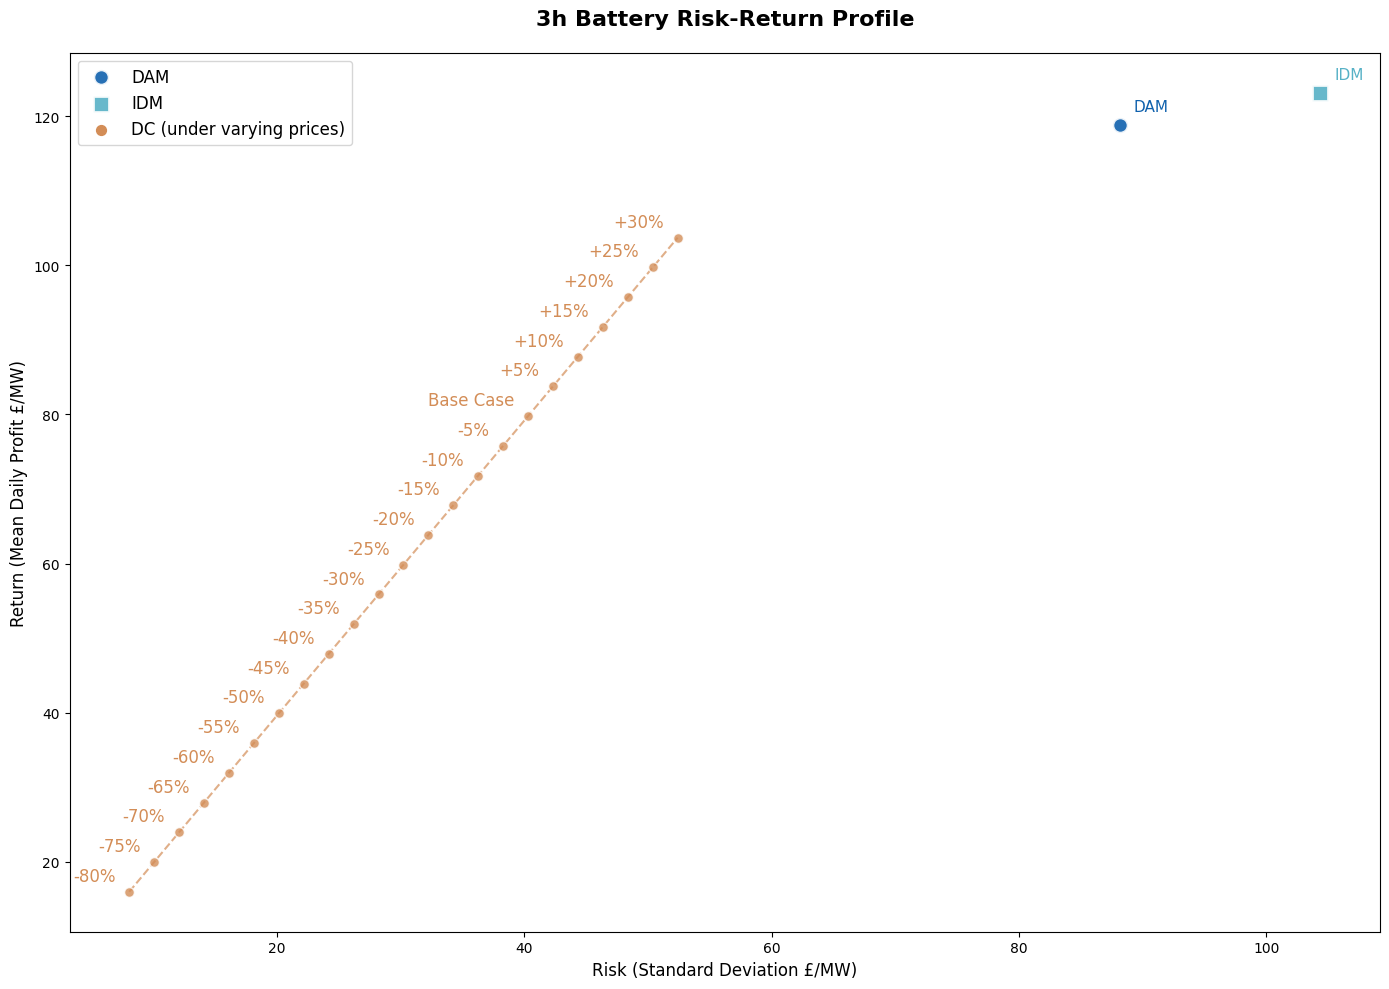

In [17]:
'''3h Risk-Return Profile - All DC Price Scenarios Combined (Overlay with Profit Stats CSV, minimal legend, lines, dots)'''
import pandas as pd
import matplotlib.pyplot as plt

# Load main stats
main_stats = pd.read_csv('/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Fig_14_Appendix_9_Model_Outputs/Fig_14_Appendix_9_Data.csv')
main_stats['duration'] = main_stats['energy_mwh'] / main_stats['power_mw']
main_3h = main_stats[(main_stats['duration'] == 3.0)].copy()

# Load overlay stats
overlay_stats = pd.read_csv('/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Fig_14_Appendix_9_Model_Outputs/Fig_14_Appendix_9_Data.csv')
overlay_stats['duration'] = overlay_stats['energy_mwh'] / overlay_stats['power_mw']
overlay_3h = overlay_stats[(overlay_stats['duration'] == 3.0)].copy()

# Normalized values (per MW)
for df in [main_3h, overlay_3h]:
    df['dam_mean_norm'] = df['dam_mean'] / df['power_mw']
    df['idm_mean_norm'] = df['idm_mean'] / df['power_mw']
    df['dc_mean_norm'] = df['dc_mean'] / df['power_mw']
    df['dam_std_norm'] = df['dam_std'] / df['power_mw']
    df['idm_std_norm'] = df['idm_std'] / df['power_mw']
    df['dc_std_norm'] = df['dc_std'] / df['power_mw']

# Sort scenarios by scale factor (dc_price_scale_factor already in CSV)
main_scenarios = main_3h[['scenario', 'dc_price_scale_factor']].drop_duplicates().sort_values('dc_price_scale_factor')['scenario'].tolist()
overlay_scenarios = overlay_3h[['scenario', 'dc_price_scale_factor']].drop_duplicates().sort_values('dc_price_scale_factor')['scenario'].tolist()

# Colors and markers
main_colors = {'DAM': '#0f61ad', 'IDM': '#56b1c6', 'DC': '#d38d57'}
overlay_colors = {'DAM': '#ff9800', 'IDM': '#8bc34a', 'DC': '#e91e63'}
markers = {'DAM': 'o', 'IDM': 's', 'DC': 'o'}  # use small dots for DC

fig, ax = plt.subplots(1, 1, figsize=(14, 10))
legend_elements = []

# Plot DAM/IDM (identical for both datasets)
dam_mean = main_3h['dam_mean_norm'].mean()
dam_std = main_3h['dam_std_norm'].mean()
dam_scatter = ax.scatter(dam_std, dam_mean, c=main_colors['DAM'], marker=markers['DAM'],
                         s=120, alpha=0.9, linewidth=2, edgecolor='white', zorder=5)
ax.annotate('DAM', (dam_std, dam_mean), xytext=(10, 10), textcoords='offset points',
            fontsize=11, fontweight='normal', color=main_colors['DAM'])
legend_elements.append((dam_scatter, 'DAM'))

idm_mean = main_3h['idm_mean_norm'].mean()
idm_std = main_3h['idm_std_norm'].mean()
idm_scatter = ax.scatter(idm_std, idm_mean, c=main_colors['IDM'], marker=markers['IDM'],
                         s=120, alpha=0.9, linewidth=2, edgecolor='white', zorder=5)
ax.annotate('IDM', (idm_std, idm_mean), xytext=(10, 10), textcoords='offset points',
            fontsize=11, fontweight='normal', color=main_colors['IDM'])
legend_elements.append((idm_scatter, 'IDM'))

# Plot DC scenarios from main as small dots, connect with thin line
main_dc_x = []
main_dc_y = []
for scenario in main_scenarios:
    scenario_data = main_3h[main_3h['scenario'] == scenario]
    dc_mean_norm = scenario_data['dc_mean_norm'].mean()
    dc_std_norm = scenario_data['dc_std_norm'].mean()
    main_dc_x.append(dc_std_norm)
    main_dc_y.append(dc_mean_norm)
    # Format label: "base_case" -> "Base Case", "down_xx%" -> "-xx%", else keep as is
    if scenario == 'base_case':
        label = 'Base Case'
    elif scenario.startswith('down_'):
        percent = scenario.replace('down_', '').replace('%', '')
        label = f'-{percent}%'
    elif scenario.startswith('up_'):
        percent = scenario.replace('up_', '').replace('%', '')
        label = f'+{percent}%'
    else:
        label = scenario
    ax.scatter(dc_std_norm, dc_mean_norm, c=main_colors['DC'], marker='o',
               s=50, alpha=0.8, linewidth=1, edgecolor='white', zorder=3)
    # Shift labels slightly to the left with larger font size
    ax.annotate(label, (dc_std_norm, dc_mean_norm),
                xytext=(-10, 5), textcoords='offset points', fontsize=12, fontweight='normal',
                color=main_colors['DC'], ha='right', va='bottom')
# Connect main DC points
ax.plot(main_dc_x, main_dc_y, color=main_colors['DC'], linewidth=1.5, alpha=0.7, label='_nolegend_',linestyle="--")
legend_elements.append((ax.scatter([], [], c=main_colors['DC'], marker='o', s=50), 'DC (under varying prices)'))

# Customize plot
ax.set_xlabel('Risk (Standard Deviation £/MW)', fontsize=12)
ax.set_ylabel('Return (Mean Daily Profit £/MW)', fontsize=12)
ax.set_title('3h Battery Risk-Return Profile', fontsize=16, fontweight='bold', pad=20)

# Add legend
ax.legend([element[0] for element in legend_elements],
          [element[1] for element in legend_elements],
          loc='best', fontsize=12, frameon=True)

plt.tight_layout()

# Print coordinates for base_case before plotting
main_base = main_3h[main_3h['scenario'] == 'base_case']

print("Main base_case DC plot coords:", 
      main_base['dc_std_norm'].values, main_base['dc_mean_norm'].values)

Main base_case DC plot coords: [40.31315333] [79.78672]


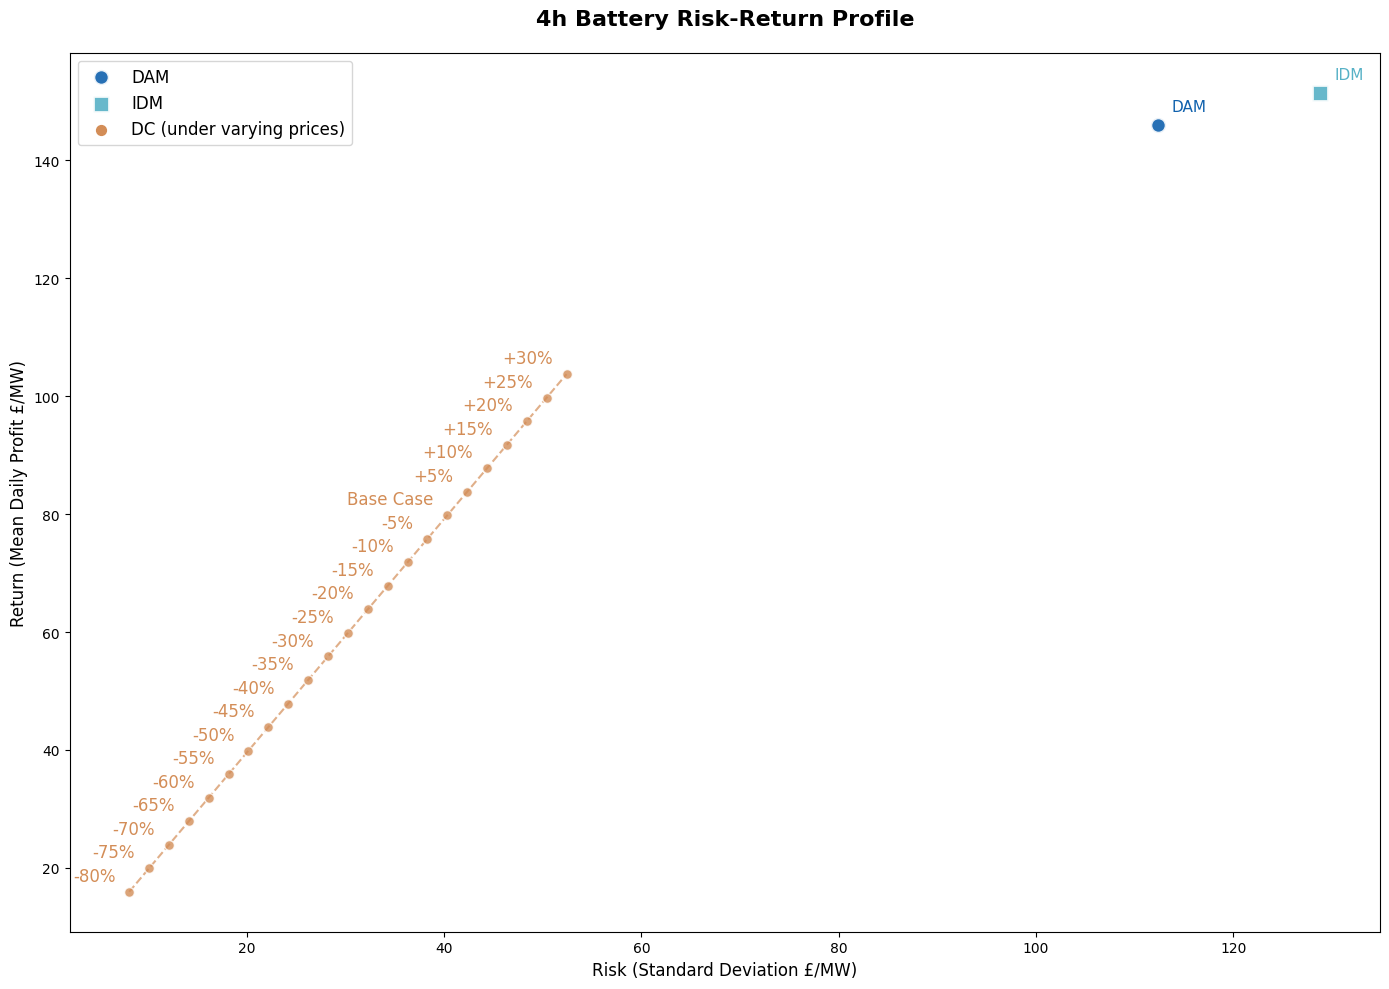

In [18]:
'''4h Risk-Return Profile - All DC Price Scenarios Combined (Overlay with Profit Stats CSV, minimal legend, lines, dots)'''
import pandas as pd
import matplotlib.pyplot as plt

# Load main stats
main_stats = pd.read_csv('/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Fig_14_Appendix_9_Model_Outputs/Fig_14_Appendix_9_Data.csv')
main_stats['duration'] = main_stats['energy_mwh'] / main_stats['power_mw']
main_4h = main_stats[(main_stats['duration'] == 4.0)].copy()

# Load overlay stats
overlay_stats = pd.read_csv('/Users/haixiaosun/Library/Mobile Documents/com~apple~CloudDocs/Coding Work/Markowitz exploration/Fig_14_Appendix_9_Model_Outputs/Fig_14_Appendix_9_Data.csv')
overlay_stats['duration'] = overlay_stats['energy_mwh'] / overlay_stats['power_mw']
overlay_4h = overlay_stats[(overlay_stats['duration'] == 4.0)].copy()

# Normalized values (per MW)
for df in [main_4h, overlay_4h]:
    df['dam_mean_norm'] = df['dam_mean'] / df['power_mw']
    df['idm_mean_norm'] = df['idm_mean'] / df['power_mw']
    df['dc_mean_norm'] = df['dc_mean'] / df['power_mw']
    df['dam_std_norm'] = df['dam_std'] / df['power_mw']
    df['idm_std_norm'] = df['idm_std'] / df['power_mw']
    df['dc_std_norm'] = df['dc_std'] / df['power_mw']

# Sort scenarios by scale factor (dc_price_scale_factor already in CSV)
main_scenarios = main_4h[['scenario', 'dc_price_scale_factor']].drop_duplicates().sort_values('dc_price_scale_factor')['scenario'].tolist()
overlay_scenarios = overlay_4h[['scenario', 'dc_price_scale_factor']].drop_duplicates().sort_values('dc_price_scale_factor')['scenario'].tolist()

# Colors and markers
main_colors = {'DAM': '#0f61ad', 'IDM': '#56b1c6', 'DC': '#d38d57'}
overlay_colors = {'DAM': '#ff9800', 'IDM': '#8bc34a', 'DC': '#e91e63'}
markers = {'DAM': 'o', 'IDM': 's', 'DC': 'o'}  # use small dots for DC

fig, ax = plt.subplots(1, 1, figsize=(14, 10))
legend_elements = []

# Plot DAM/IDM (identical for both datasets)
dam_mean = main_4h['dam_mean_norm'].mean()
dam_std = main_4h['dam_std_norm'].mean()
dam_scatter = ax.scatter(dam_std, dam_mean, c=main_colors['DAM'], marker=markers['DAM'],
                         s=120, alpha=0.9, linewidth=2, edgecolor='white', zorder=5)
ax.annotate('DAM', (dam_std, dam_mean), xytext=(10, 10), textcoords='offset points',
            fontsize=11, fontweight='normal', color=main_colors['DAM'])
legend_elements.append((dam_scatter, 'DAM'))

idm_mean = main_4h['idm_mean_norm'].mean()
idm_std = main_4h['idm_std_norm'].mean()
idm_scatter = ax.scatter(idm_std, idm_mean, c=main_colors['IDM'], marker=markers['IDM'],
                         s=120, alpha=0.9, linewidth=2, edgecolor='white', zorder=5)
ax.annotate('IDM', (idm_std, idm_mean), xytext=(10, 10), textcoords='offset points',
            fontsize=11, fontweight='normal', color=main_colors['IDM'])
legend_elements.append((idm_scatter, 'IDM'))

# Plot DC scenarios from main as small dots, connect with thin line
main_dc_x = []
main_dc_y = []
for scenario in main_scenarios:
    scenario_data = main_4h[main_4h['scenario'] == scenario]
    dc_mean_norm = scenario_data['dc_mean_norm'].mean()
    dc_std_norm = scenario_data['dc_std_norm'].mean()
    main_dc_x.append(dc_std_norm)
    main_dc_y.append(dc_mean_norm)
    # Format label: "base_case" -> "Base Case", "down_xx%" -> "-xx%", else keep as is
    if scenario == 'base_case':
        label = 'Base Case'
    elif scenario.startswith('down_'):
        percent = scenario.replace('down_', '').replace('%', '')
        label = f'-{percent}%'
    elif scenario.startswith('up_'):
        percent = scenario.replace('up_', '').replace('%', '')
        label = f'+{percent}%'
    else:
        label = scenario
    ax.scatter(dc_std_norm, dc_mean_norm, c=main_colors['DC'], marker='o',
               s=50, alpha=0.8, linewidth=1, edgecolor='white', zorder=3)
    # Shift labels slightly to the left with larger font size
    ax.annotate(label, (dc_std_norm, dc_mean_norm),
                xytext=(-10, 5), textcoords='offset points', fontsize=12, fontweight='normal',
                color=main_colors['DC'], ha='right', va='bottom')
# Connect main DC points
ax.plot(main_dc_x, main_dc_y, color=main_colors['DC'], linewidth=1.5, alpha=0.7, label='_nolegend_',linestyle="--")
legend_elements.append((ax.scatter([], [], c=main_colors['DC'], marker='o', s=50), 'DC (under varying prices)'))

# Customize plot
ax.set_xlabel('Risk (Standard Deviation £/MW)', fontsize=12)
ax.set_ylabel('Return (Mean Daily Profit £/MW)', fontsize=12)
ax.set_title('4h Battery Risk-Return Profile', fontsize=16, fontweight='bold', pad=20)


# Add legend
ax.legend([element[0] for element in legend_elements],
          [element[1] for element in legend_elements],
          loc='best', fontsize=12, frameon=True)

plt.tight_layout()

# Print coordinates for base_case before plotting
main_base = main_4h[main_4h['scenario'] == 'base_case']

print("Main base_case DC plot coords:", 
      main_base['dc_std_norm'].values, main_base['dc_mean_norm'].values)